<a href="https://colab.research.google.com/github/ShanBore/Patient-Healthcare-Analysis/blob/main/Emr_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the emr dataset.
df = pd.read_csv('/content/emr_data.csv')

df.head()

,Patient ID,Age,Gender,Race,Primary Diagnosis,Secondary Diagnosis 1,Secondary Diagnosis 2,Medication,Procedure Code,Visit Date,...,Length of Stay,Insurance Type,Physician ID,Hospital Department,Source System,Blood Pressure,Heart Rate,Temperature,Blood Glucose,Cholesterol
0,48beba63-637d-4b44-8c25-a1ae03af1754,59.0,Male,White,M54.5,R10.9,NaN,Fluticasone,71020,2023-01-25,...,0,Medicare,b21b962d-6adf-4aed-b1c9-10b3bb5866c2,Pediatrics,System A,135/77,71,99.8,84,209
1,90a355e7-9ffb-4bb4-9b48-07fb2b5788e9,47.0,Male,White,M54.5,NaN,NaN,Metformin,93000,2023-02-06,...,9,Medicaid,a548f160-1119-4e21-9690-546a092d9406,Cardiology,System B,112/87,71,98.2,95,129
2,75fac940-2673-4bd7-99c6-4a68de16f5c2,62.0,Male,Other,E11.9,NaN,NaN,Metformin,99214,2023-04-09,...,0,Private,c64fffd9-70f5-454b-beb5-a4c9d92989f9,Cardiology,System C,78/75,57,97.9,127,164
3,ea0a54b9-e74b-4eff-bc8e-400d39fbf52a,80.0,Male,Asian,J06.9,E11.9,NaN,Amlodipine,73630,2024-04-20,...,1,Medicare,2fafdda7-f83d-41a4-9307-64714975f3e8,ER,System A,129/88,71,99.3,111,210
4,8e5eac96-defb-4ebb-9a4e-a0a1304893c3,45.0,Female,White,R10.9,NaN,NaN,Fluticasone,93000,2023-08-06,...,0,Private,70ec392f-33e6-42d9-a8ff-ea722cd2401a,Cardiology,System C,91/92,73,98.7,71,207


In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient ID             10200 non-null  object 
 1   Age                    9687 non-null   float64
 2   Gender                 10200 non-null  object 
 3   Race                   10200 non-null  object 
 4   Primary Diagnosis      10200 non-null  object 
 5   Secondary Diagnosis 1  3060 non-null   object 
 6   Secondary Diagnosis 2  1568 non-null   object 
 7   Medication             10200 non-null  object 
 8   Procedure Code         10200 non-null  int64  
 9   Visit Date             10200 non-null  object 
 10  Discharge Date         5104 non-null   object 
 11  Length of Stay         10200 non-null  int64  
 12  Insurance Type         10200 non-null  object 
 13  Physician ID           10200 non-null  object 
 14  Hospital Department    10200 non-null  object 
 15  So

,Age,Procedure Code,Length of Stay,Heart Rate,Temperature,Blood Glucose,Cholesterol
count,9687.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000
mean,49.510994,76300.099314,2.490784,69.322745,98.604382,99.477353,200.115098
std,19.800623,27164.020479,2.949175,10.014391,0.695585,20.092415,40.315564
min,0.000000,20610.000000,0.000000,29.000000,95.800000,22.000000,66.000000
25%,36.000000,71020.000000,0.000000,62.000000,98.100000,86.000000,173.000000
50%,50.000000,93000.000000,2.000000,69.000000,98.600000,99.000000,200.000000
75%,63.000000,99213.000000,4.000000,76.000000,99.100000,113.000000,227.000000
max,100.000000,99214.000000,28.000000,118.000000,101.000000,170.000000,368.000000


Check for missing values.

In [32]:
# check for missing values.
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Patient ID                  0
Age                       513
Gender                      0
Race                        0
Primary Diagnosis           0
Secondary Diagnosis 1    7140
Secondary Diagnosis 2    8632
Medication                  0
Procedure Code              0
Visit Date                  0
Discharge Date           5096
Length of Stay              0
Insurance Type              0
Physician ID                0
Hospital Department         0
Source System               0
Blood Pressure            513
Heart Rate                  0
Temperature                 0
Blood Glucose               0
Cholesterol                 0
dtype: int64


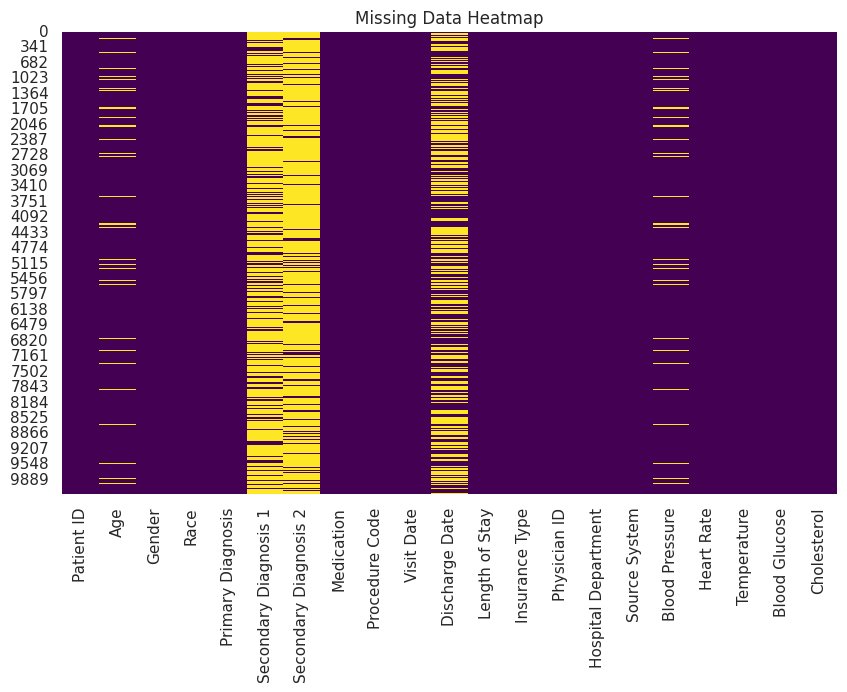

In [33]:
# visualize missing data with a heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [35]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
198


In [41]:
# remove duplicate data
df = df.drop_duplicates()

# **Lets explore the numerical features.**

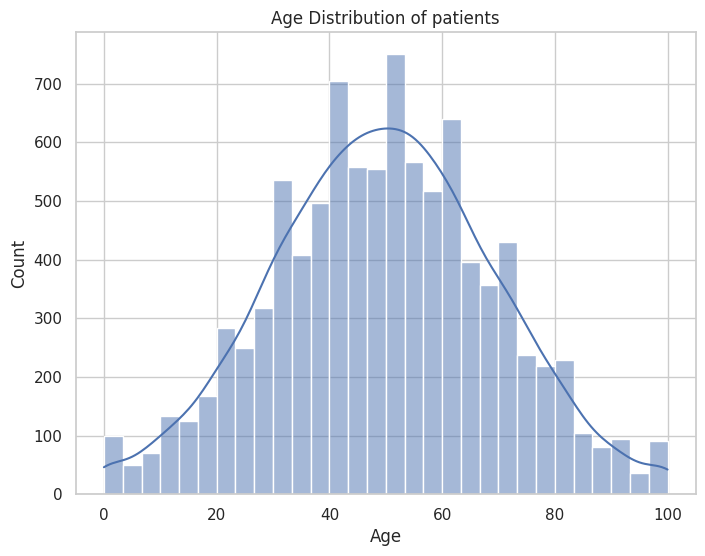

In [42]:
# visualize the Age Distribution of patients.
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of patients')
plt.show()

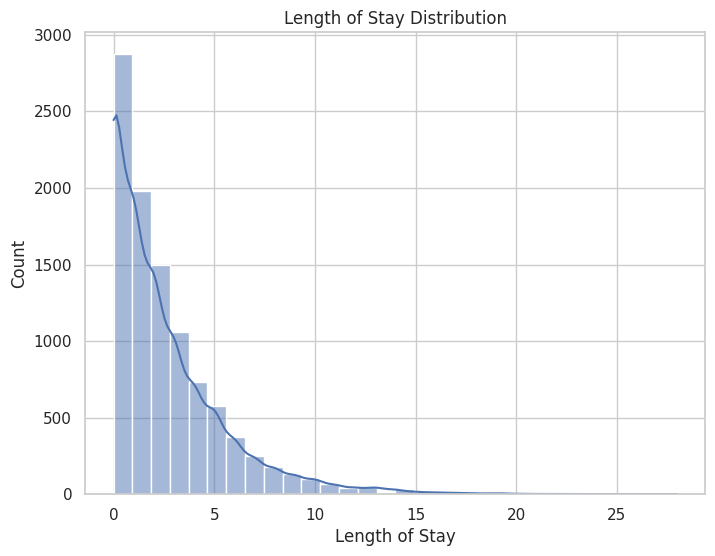

In [43]:
# Length of Stay Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Length of Stay'].dropna(), bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.show()


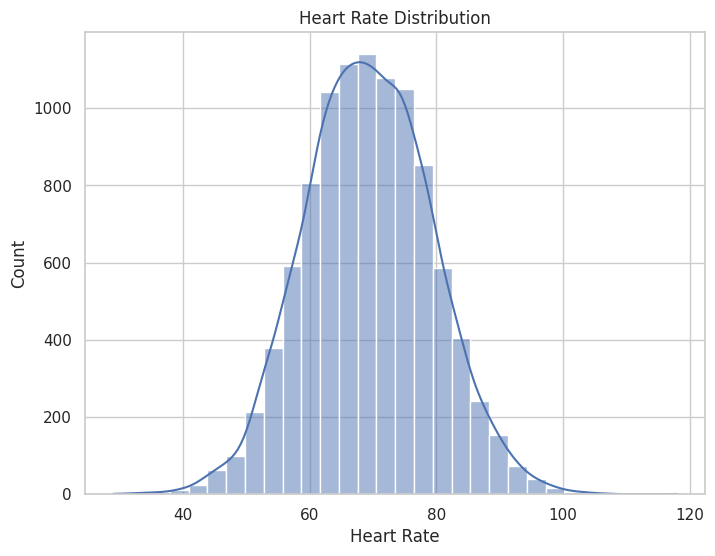

In [45]:
# Heart Rate Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Heart Rate'].dropna(), bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.show()

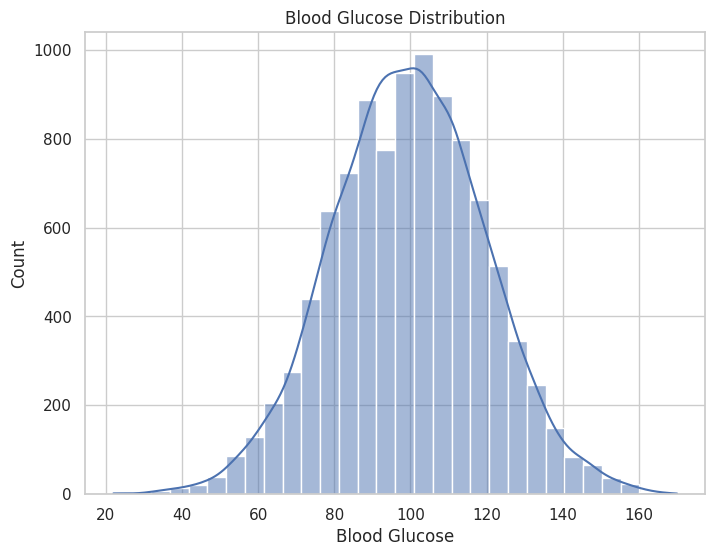

In [46]:
# Blood Glucose Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Blood Glucose'].dropna(), bins=30, kde=True)
plt.title('Blood Glucose Distribution')
plt.show()

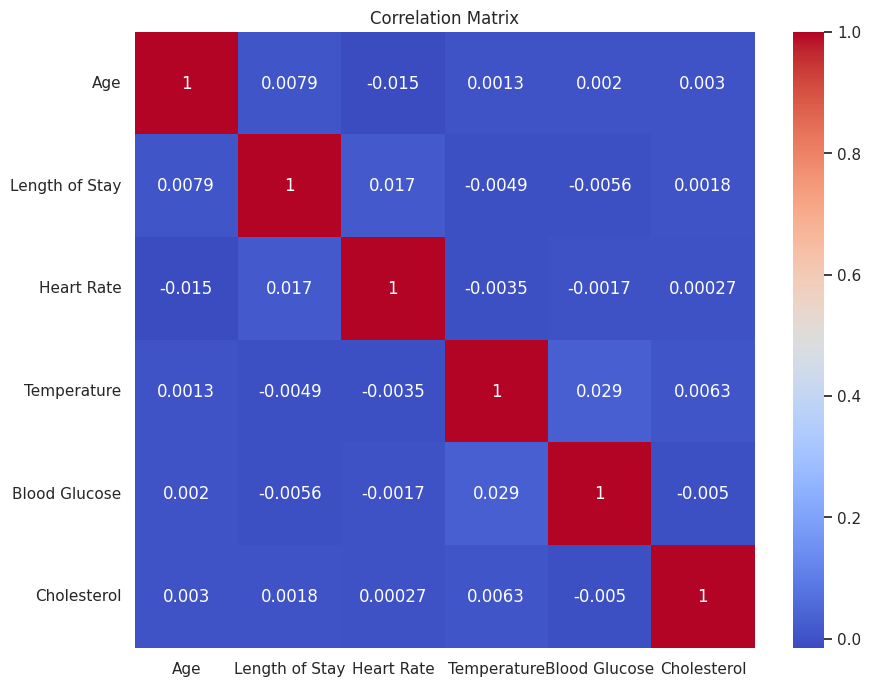

In [49]:
# Correlation matrix numerical features.
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Length of Stay', 'Heart Rate', 'Temperature', 'Blood Glucose', 'Cholesterol']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Now we explore the categorical features.**

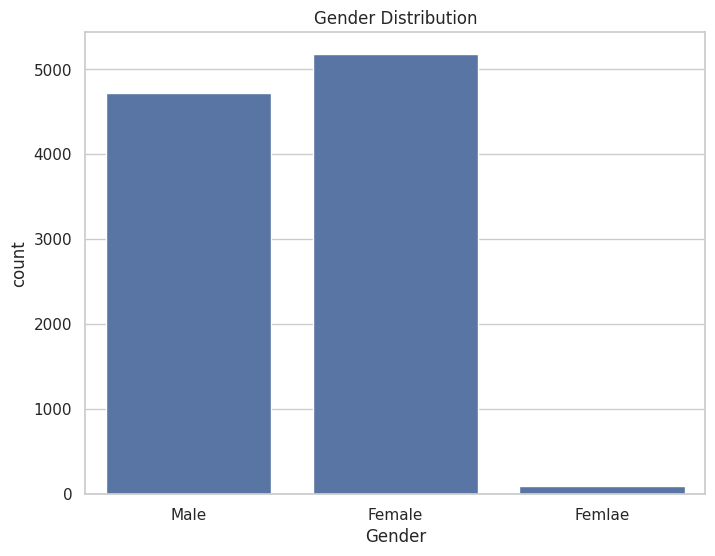

In [52]:
# Gender Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [57]:
df['Gender'].replace('Femlae', 'Other', inplace=True)

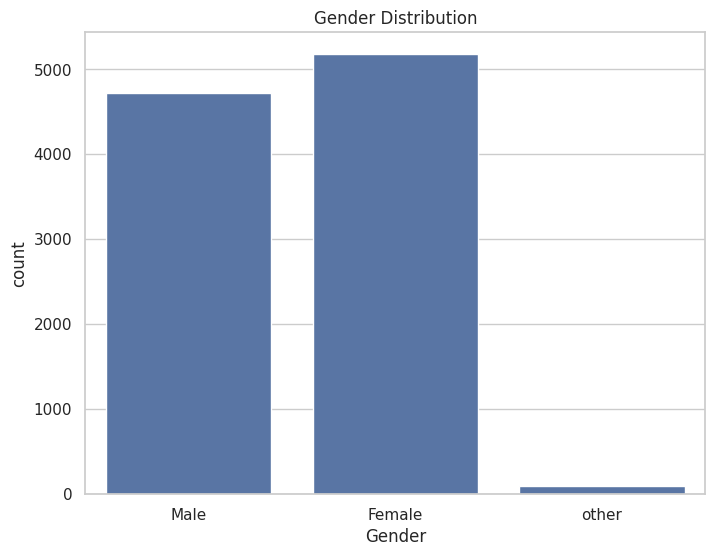

In [58]:
# Gender Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

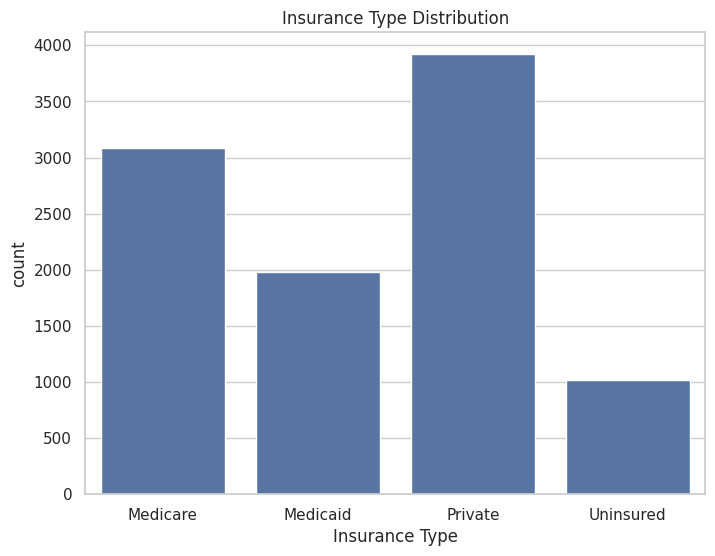

In [53]:
# Insurance Type Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance Type', data=df)
plt.title('Insurance Type Distribution')
plt.show()

In [60]:
# Analyzing typos or inconsistencies in categorical data.
print("\nUnique values in 'Gender' column:")
print(df['Gender'].unique())

print("\nUnique values in 'Race' column:")
print(df['Race'].unique())


Unique values in 'Gender' column:
['Male' 'Female' 'other']

Unique values in 'Race' column:
['White' 'Other' 'Asian' 'Black or African American' 'Hispanic or Latino']
